In [31]:
! pip install numpy pandas matplotlib tensorflow scikit-learn shap


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



In [33]:
# 데이터 준비
df = pd.read_csv("data/bsmax_0_1", sep='\t') 

# ymd 지우기
df = df.drop(['ymd'], axis=1)

print(df.shape) # (2276, 28)
header = "init	rtn	avg	dev	bkmax	skmax	bomega	somega	bpri	bfor	bmom	bc	bpmax	bmax	bmomn	bcn	bpmaxn	bmaxn	spri	sfor	smom	sc	spmax	smax	smomn	scn	spmaxn	smaxn".split("\t")
print(header)

(2276, 28)
['init', 'rtn', 'avg', 'dev', 'bkmax', 'skmax', 'bomega', 'somega', 'bpri', 'bfor', 'bmom', 'bc', 'bpmax', 'bmax', 'bmomn', 'bcn', 'bpmaxn', 'bmaxn', 'spri', 'sfor', 'smom', 'sc', 'spmax', 'smax', 'smomn', 'scn', 'spmaxn', 'smaxn']


In [34]:
# StandardScaler를 사용하여 데이터를 정규화합니다.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 타겟 변수와 피처 분리
target = df['init'].values
features = df.drop(['init'], axis=1).values
scaled_features = scaler.fit_transform(features)
# # 예측하려는 타겟 변수 'init'과 피쳐들을 분리합니다.
# target = scaled_data[1:, 0]
# features = scaled_data[1:, 1:]
print(target, features)



[192333 192562 188812 ... 239143 246583 242833] [[-5.000000e+02  1.926700e+05  1.452000e+03 ...  5.200000e-02
   1.293851e+03  0.000000e+00]
 [-4.848000e+03  1.877880e+05  1.542000e+03 ...  3.200000e-02
   1.239855e+03  6.333000e+00]
 [-2.098000e+03  1.870490e+05  5.740000e+02 ...  6.500000e-02
   9.450910e+02  0.000000e+00]
 ...
 [ 5.670000e+03  2.430080e+05  1.479000e+03 ...  5.700000e-02
   9.658840e+02  0.000000e+00]
 [-3.699000e+03  2.474680e+05  1.374000e+03 ...  4.500000e-02
   1.245332e+03  1.000000e-01]
 [-4.048000e+03  2.366780e+05  2.135000e+03 ...  6.800000e-02
   4.122550e+02  1.000000e+00]]


In [35]:
# 데이터를 시계열 형식으로 변환합니다.
def create_sequences(features, target, time_steps=1):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # 시퀀스 길이 조정
X, y = create_sequences(features, target, time_steps)

# 데이터를 학습용과 검증용으로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM 모델을 구축합니다.
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# 예측
y_pred = model.predict(X_test)


Epoch 1/200


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 40125681664.0000 - val_loss: 41288638464.0000
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40511467520.0000 - val_loss: 41282093056.0000
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39790600192.0000 - val_loss: 41273024512.0000
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 40539422720.0000 - val_loss: 41261060096.0000
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39727894528.0000 - val_loss: 41246179328.0000
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 40241774592.0000 - val_loss: 41228247040.0000
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40805761024.0000 - val_loss: 41207304192.0000
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39886987264.0000 - val_loss: 41183514624.0000
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40213782528.0000 - val_loss: 41156710400.0000
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4

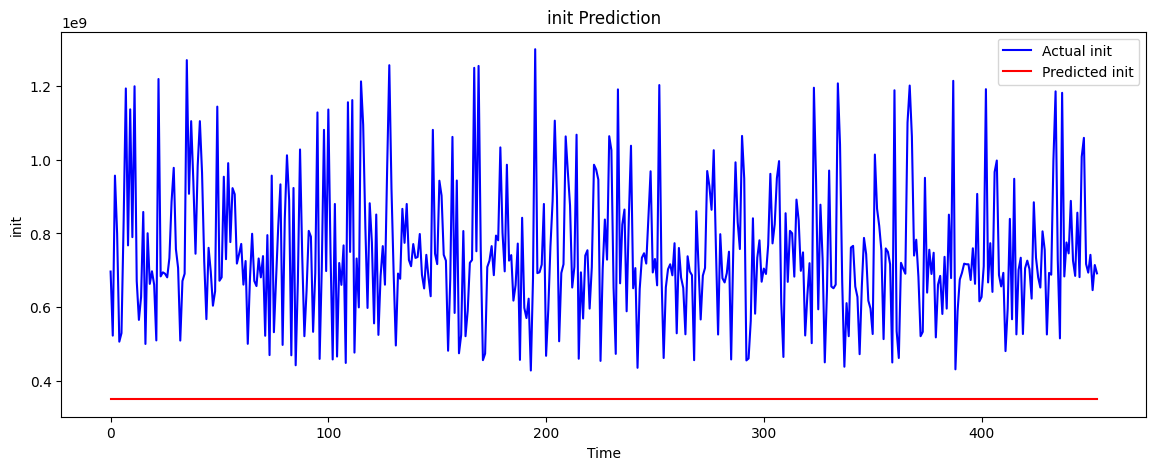

In [36]:
# 예측값 역변환 (원래 스케일로 되돌림)
y_test_unscaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_features.shape[1] - 1))), axis=1))[:, 0]
y_pred_unscaled = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled_features.shape[1] - 1))), axis=1))[:, 0]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(y_test_unscaled, color='blue', label='Actual init')
plt.plot(y_pred_unscaled, color='red', label='Predicted init')
plt.title('init Prediction')
plt.xlabel('Time')
plt.ylabel('init')
plt.legend()
plt.show()

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 준비
df = pd.read_csv("/mnt/data/bsmax_0_1", sep='\t')

# ymd 지우기
df = df.drop(['ymd'], axis=1)

# 데이터 분포 시각화
plt.figure(figsize=(14, 5))
df['init'].plot(kind='line')
plt.title('init Variable Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('init')
plt.show()

# 타겟 변수와 피처 분리
target = df['init'].values
features = df.drop(['init'], axis=1).values

# 피처 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 시퀀스 생성 함수
def create_sequences(features, target, time_steps=1):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

# 시퀀스 길이 설정
time_steps = 10
X, y = create_sequences(scaled_features, target, time_steps)

# 학습용과 검증용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다양한 모델 구조 실험 (Conv1D + GRU 모델)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 시각화
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual init')
plt.plot(y_pred, color='red', label='Predicted init')
plt.title('init Prediction')
plt.xlabel('Time')
plt.ylabel('init')
plt.legend()
plt.show()

# 데이터 스케일링 및 시퀀스 생성 확인
print("Scaled features shape:", scaled_features.shape)
print("Sequences shape:", X.shape)
print("First sequence sample:", X[0])
print("First target sample:", y[0])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/bsmax_0_1'